<AxesSubplot:>

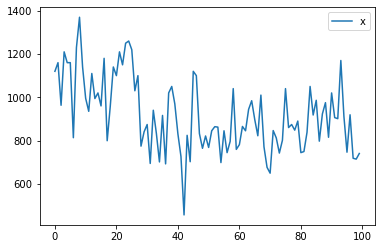

In [3]:
import pandas as pd

df=pd.read_csv('d:/data/time/nile.csv')
df.plot()

<AxesSubplot:>

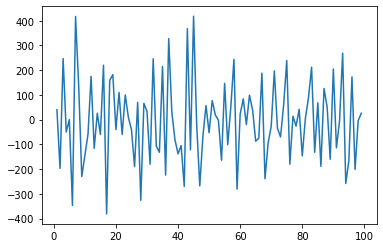

In [4]:
diff1=df['x'].diff(periods=1).iloc[1:] # 1차 차분 데이터
diff1.plot()

In [5]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
# 로그 취한 후 차분한 자료를 adfuller 함수로 안정적인 시계열인지 확인
diff1=np.log(df['x']).diff(periods=1).iloc[1:]
result=adfuller(diff1)
print(result)
print('ADF Statisitc : %f' % result[0])
print('p-value : %f' % result[1])
# p-value가 0.05보다 작으므로 95% 신뢰수준 하에 유의함(안정적인 시계열 자료임)

(-4.748414786012475, 6.818878743916672e-05, 9, 89, {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}, -64.46023083112888)
ADF Statisitc : -4.748415
p-value : 0.000068


In [6]:
from pmdarima.arima import auto_arima
model=auto_arima(df, suppress_warnings=True)
model
# 가장 적절한 모형은 arima(1,1,1)

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [7]:
# 학습용, 검증용 구분
n=int(df.shape[0]*.8)
train=df[:n]
test=df[n:]
print(len(df['x']))
print(train['x'].values)
print(test['x'].values)

100
[1120 1160  963 1210 1160 1160  813 1230 1370 1140  995  935 1110  994
 1020  960 1180  799  958 1140 1100 1210 1150 1250 1260 1220 1030 1100
  774  840  874  694  940  833  701  916  692 1020 1050  969  831  726
  456  824  702 1120 1100  832  764  821  768  845  864  862  698  845
  744  796 1040  759  781  865  845  944  984  897  822 1010  771  676
  649  846  812  742  801 1040  860  874  848  890]
[ 744  749  838 1050  918  986  797  923  975  815 1020  906  901 1170
  912  746  919  718  714  740]


In [8]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(train, order=(1,1,1)).fit()

In [9]:
fore=model.forecast(steps=5) # 예측값
print(fore)
# 예측값, stderr, upper bound, lower bound

(array([801.85838086, 769.0829306 , 755.15106866, 747.63252422,
       742.29671912]), array([139.37475542, 147.23414622, 148.12040116, 148.22367789,
       148.23596604]), array([[ 528.68887987, 1075.02788184],
       [ 480.50930672, 1057.65655448],
       [ 464.84041701, 1045.4617203 ],
       [ 457.1194539 , 1038.14559455],
       [ 451.75956447, 1032.83387378]]))


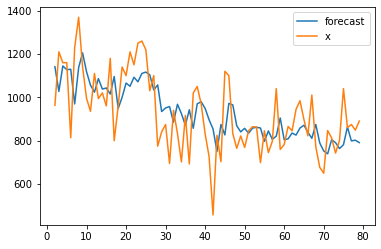

In [10]:
import matplotlib.pyplot as plt

model.plot_predict() # 실제값과 예측값
plt.show()

[ 744  749  838 1050  918  986  797  923  975  815 1020  906  901 1170
  912  746  919  718  714  740]
[801.85838086 769.0829306  755.15106866 747.63252422 742.29671912
 737.70379803 733.36371366 729.10968096 724.88493549 720.67015778
 716.45877255 712.24854193 708.03870427 703.82900036 699.61934197
 695.40969907 691.20006144 686.9904256  682.78079038 678.57115537]


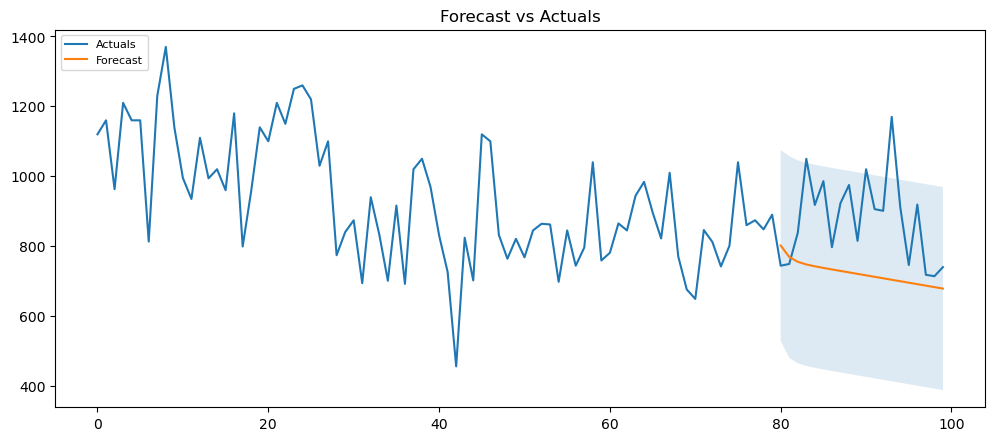

In [11]:
# 예측값, standard error, upper bound/lower bound
fc, se, conf=model.forecast(steps=len(test))
print(test['x'].values)
print(fc)
fc_series=pd.Series(fc, index=test.index)
lower=pd.Series(conf[:,0], index=test.index)
upper=pd.Series(conf[:,1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='Actuals')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower.index, lower, upper, alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()